In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
goog = pd.read_csv('GOOG.csv')

In [3]:
goog.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [4]:
goog.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(goog['Close'], label='Close')
plt.legend(loc='best')
plt.show()

In [58]:
goog_close = goog['Close'].to_numpy()

In [59]:
goog_close.shape

(3932,)

## 1. Moving Average

In [ ]:
short = 42
long = 252

mavgs = goog['Close'].rolling(short).mean()
mavgl = goog['Close'].rolling(long).mean()

plt.figure(figsize = (12,8))
plt.plot(mavgs, 'b', label = 'Short Term')
plt.plot(mavgl, 'r', label = 'Long Term')
plt.legend(loc='best')
plt.show()

## 2. Stock Prediction

### normalize the stock price (graded)

In [ ]:
goog_close = ???

### Write a function that outputs X and y with a sequence input and a window size (graded)

In [ ]:
# replace "???" by your code

def matrization(seq, window):
    seq_len = seq.shape[0]
    M = np.zeros(seq_len-window, window+1) #define a matrix with certain size
    for i in range(???):
        ???
    return M(:,:-1), M(:,-1) # returns the first window-1 columns to X, and last column to y

In [ ]:
X, y = matrization(goog_close, 10)

In [ ]:
# reserve the last 10% for model testing

seq_len = goog.shape[0]
test_size = int(0.9*seq_len)

X_new, y_new = X[:test_size, :], y[:test_size]
X_test, y_test = X[test_size:, :], y[test_size:]

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X_new, y_new, test_size = 0.2)

In [ ]:
mirrored_strategy = tf.distribute.MirroredStrategy(
    cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())

### Building your standard neuron model (graded)

In [ ]:
# no need to run mirror strategy if you are using only 1 GPU, or you do not have GPU

with mirrored_strategy.scope():
    model = keras.models.Sequential([
        keras.layers.???(input_shape=[???]),
        ???
    ])
    
model.summary()
model.compile(loss=???, optimizer="adam")

In [ ]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_validation, y_validation))

In [ ]:
def plot_train_valid(history):
    train_loss = history.history["loss"]
    valid_loss = history.history["val_loss"]

    plt.figure(figsize=(12,8))
    plt.plot(np.arange(len(train_loss)) + 1, train_loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(valid_loss)) + 1, valid_loss, "r.-", label="Validation loss")
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

In [ ]:
plot_train_valid(history)

### Now, we use the last 10% test set to see if the prediction goes well

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y_test, 'b.-', label='Actual')
plt.plot(y_predict, 'r', label='Predict')
plt.legend(loc='best')
plt.show()

### Anything counter intuitive about the prediction?

In [ ]:
# your code here


## 3. Now, try the above using LSTM

In [ ]:
# your code here


## 4. Multiple days prediction

### Complete the function similar to the above (graded)

In [ ]:
# complete the function by yourself
def multi_matrization(seq, window, out_size):
    

### Tensorflow training with LSTM (graded)

## 5. Multiple sequences as input

In [88]:
goog_mult = goog[['Open', 'High', 'Low', 'Close', 'Volume']].to_numpy()

In [91]:
goog_mult_norm = goog_mult.copy()

In [92]:
for i in range(5):
    mean = goog_mult[:, i].mean()
    std = goog_mult[:, i].std()
    goog_mult_norm[:, i] = (goog_mult[:, i] - mean)/std

In [93]:
goog_mult_norm

array([[-1.28439948, -1.28073017, -1.28673282, -1.2828521 ,  4.71071204],
       [-1.28297513, -1.27371132, -1.28027857, -1.27162262,  1.98217388],
       [-1.26923929, -1.26755933, -1.26812356, -1.27008684,  1.40980114],
       ...,
       [ 1.7596444 ,  1.80621532,  1.7061307 ,  1.81955535, -0.55228015],
       [ 1.82266409,  1.87268142,  1.82502578,  1.86478343, -0.56319256],
       [ 1.75103784,  1.74463309,  1.70889893,  1.70302117, -0.58102322]])

In [94]:
goog_mult.shape

(3932, 5)

In [95]:
X = np.zeros((3922, 10, 5))#10就是10天绑在一起作为一组，变成三维，变成10*5的matrix

In [96]:
for i in range(3922):
    X[i,:,:] = goog_mult_norm[i:i+10, :]

In [97]:
X[0,:,:]

array([[-1.28439948, -1.28073017, -1.28673282, -1.2828521 ,  4.71071204],
       [-1.28297513, -1.27371132, -1.28027857, -1.27162262,  1.98217388],
       [-1.26923929, -1.26755933, -1.26812356, -1.27008684,  1.40980114],
       [-1.26854828, -1.27018791, -1.27591414, -1.27646948,  1.03364027],
       [-1.27740464, -1.27522135, -1.27547343, -1.27487733,  0.27616717],
       [-1.27741874, -1.27529126, -1.27436456, -1.27218621,  0.01443107],
       [-1.27297646, -1.27435448, -1.27290027, -1.27466599, -0.0959871 ],
       [-1.27695336, -1.27873078, -1.2781319 , -1.28049913, -0.22287964],
       [-1.28115591, -1.28121953, -1.27791865, -1.2799919 , -0.25774461],
       [-1.28059181, -1.28225418, -1.28145854, -1.28297892,  0.26988351]])

In [98]:
y = goog_mult_norm[10:,3]

In [99]:
y.shape

(3922,)

In [100]:
# reserve the last 10% for model testing

seq_len = goog.shape[0]
test_size = int(0.9*seq_len)

X_new, y_new = X[:test_size,:,:], y[:test_size]
X_test, y_test = X[test_size:,:,:], y[test_size:]

In [101]:
X_train, X_validation, y_train, y_validation = train_test_split(X_new, y_new, test_size = 0.2)

In [102]:
X_train.shape[-2:]

(10, 5)

In [103]:
y_train.shape

(2830,)

In [104]:
X_validation.shape

(708, 10, 5)

In [105]:
mirrored_strategy = tf.distribute.MirroredStrategy(
    cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [106]:
with mirrored_strategy.scope():
    model = keras.models.Sequential([
        keras.layers.LSTM(40, return_sequences=True, input_shape = [10, 5]),
        keras.layers.LSTM(40),
#        keras.layers.Flatten(),
        keras.layers.Dense(1)
    ])
    
model.summary()
model.compile(loss='mse', optimizer="adam")

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 10, 40)            7360      
_________________________________________________________________
lstm_23 (LSTM)               (None, 40)                12960     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 41        
Total params: 20,361
Trainable params: 20,361
Non-trainable params: 0
_________________________________________________________________


In [107]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_validation, y_validation))

Train on 2830 samples, validate on 708 samples
Epoch 1/20
2830/2830 [==============================] - 8s 3ms/sample - loss: 0.0585 - val_loss: 0.0048
Epoch 2/20
2830/2830 [==============================] - 1s 230us/sample - loss: 0.0032 - val_loss: 0.0028
Epoch 3/20
2830/2830 [==============================] - 1s 223us/sample - loss: 0.0024 - val_loss: 0.0026
Epoch 4/20
2830/2830 [==============================] - 1s 229us/sample - loss: 0.0023 - val_loss: 0.0022
Epoch 5/20
2830/2830 [==============================] - 1s 226us/sample - loss: 0.0022 - val_loss: 0.0023
Epoch 6/20
2830/2830 [==============================] - ETA: 0s - loss: 0.002 - 1s 232us/sample - loss: 0.0020 - val_loss: 0.0023
Epoch 7/20
2830/2830 [==============================] - 1s 264us/sample - loss: 0.0019 - val_loss: 0.0022
Epoch 8/20
2830/2830 [==============================] - 1s 232us/sample - loss: 0.0019 - val_loss: 0.0019
Epoch 9/20
2830/2830 [==============================] - 1s 252us/sample - loss: 0.0

In [72]:
def plot_train_valid(history):
    train_loss = history.history["loss"]
    valid_loss = history.history["val_loss"]

    plt.figure(figsize=(12,8))
    plt.plot(np.arange(len(train_loss)) + 1, train_loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(valid_loss)) + 1, valid_loss, "r.-", label="Validation loss")
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

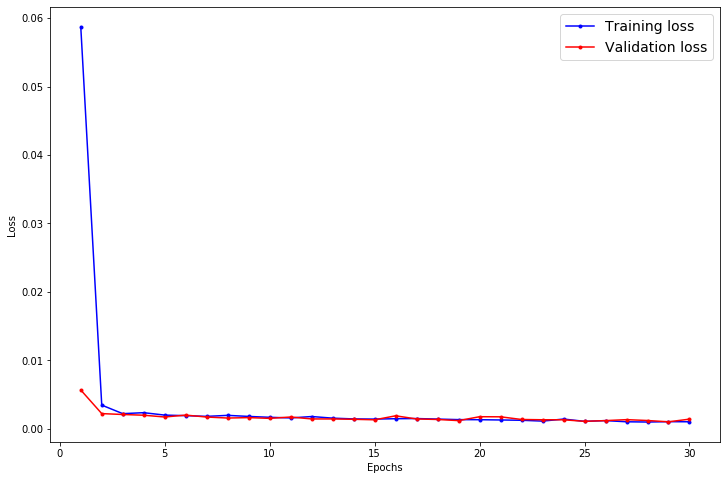

In [73]:
plot_train_valid(history)

In [108]:
y_predict = model.predict(X_test)

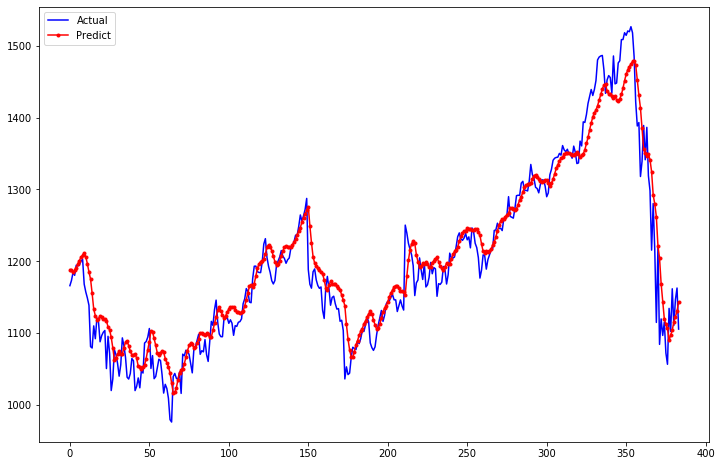

In [109]:
plt.figure(figsize=(12,8))
plt.plot(y_test*goog_mult[:, 3].std()+goog_mult[:, 3].mean(), 'b', label='Actual')
plt.plot(y_predict*goog_mult[:, 3].std()+goog_mult[:, 3].mean(), 'r.-', label='Predict')
plt.legend(loc='best')
plt.show()

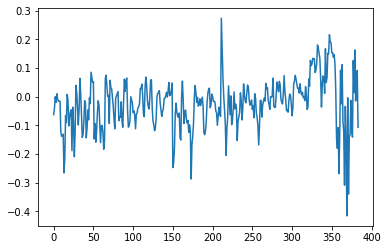

In [113]:
plt.plot(y_test-y_predict[:,0])